#### Bayesian Analysis of Population Data

*AM207 2015 - Final Project Analysis*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
from IPython import display
import time
import math
import pandas as pd
from collections import defaultdict
import scipy as sp
from statsmodels.graphics.gofplots import qqplot_2samples
# for pure convenience
from scipy.stats import norm
# you don't have to use seaborn if you prefer plain matplotlib
sns.set_context('paper')
import random
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import chi2

We now turn to a Bayesian analysis of the dependence of life expectancy on various factors. We investigated 57 different factors which are listed below.  

In [3]:
#---------------- Life Expectancy --------------#

# Life expectancy at birth, total (years) ------------- 1
data_le = pd.DataFrame.from_csv("sp.dyn.le00.in_Indicator_en_csv_v2.csv",header=2)

# Life expectancy at birth, female (years) ------------- 2
data_lefe = pd.DataFrame.from_csv("sp.dyn.le00.fe.in_Indicator_en_csv_v2.csv",header=2)

# Life expectancy at birth, male (years) ------------- 3
data_lema = pd.DataFrame.from_csv("sp.dyn.le00.ma.in_Indicator_en_csv_v2.csv",header=2)

#----------------Education-------------------------#

# Public spending on education, total (% of government expenditure) ------------- 4
data_totlgb = pd.DataFrame.from_csv("se.xpd.totl.gb.zs_Indicator_en_csv_v2.csv",header=2)

# Public spending on education, total (% of GDP) ----------------- 5
data_totlgd = pd.DataFrame.from_csv("se.xpd.totl.gd.zs_Indicator_en_csv_v2.csv",header=2)

# Expenditure per student, primary (% of GDP per capita) ------------- 6
data_primpc = pd.DataFrame.from_csv("se.xpd.prim.pc.zs_Indicator_en_csv_v2.csv",header=2)

# Expenditure per student, secondary (% of GDP per capita) ------------- 7
data_secopc = pd.DataFrame.from_csv("se.xpd.seco.pc.zs_Indicator_en_csv_v2.csv",header=2)

# Expenditure per student, tertiary (% of GDP per capita) --------------- 8
data_tertpc = pd.DataFrame.from_csv("se.xpd.tert.pc.zs_Indicator_en_csv_v2.csv",header=2)

# Literacy rate, youth male (% of males ages 15-24) ------------------ 9
data_1524ltma = pd.DataFrame.from_csv("se.adt.1524.lt.ma.zs_Indicator_en_csv_v2.csv",header=2)

# Literacy rate, youth female (% of females ages 15-24) ---------------- 10
data_1524ltfe = pd.DataFrame.from_csv("se.adt.1524.lt.fe.zs_Indicator_en_csv_v2.csv",header=2)

# Literacy rate, adult total (% of people ages 15 and above) ------------- 11
data_litr = pd.DataFrame.from_csv("se.adt.litr.zs_Indicator_en_csv_v2.csv",header=2)

# Children out of school, primary, female ------------------- 12
data_unerfe = pd.DataFrame.from_csv("se.prm.uner.fe_Indicator_en_csv_v2.csv",header=2)

# Children out of school, primary, male --------------------- 13
data_unerma = pd.DataFrame.from_csv("se.prm.uner.ma_Indicator_en_csv_v2.csv",header=2)

# Trained teachers in primary education (% of total teachers) -------------- 14
data_tcaq = pd.DataFrame.from_csv("se.prm.tcaq.zs_Indicator_en_csv_v2.csv",header=2)

# Pupil-teacher ratio, primary --------------------- 15
data_enrltc = pd.DataFrame.from_csv("se.prm.enrl.tc.zs_Indicator_en_csv_v2.csv",header=2)

# Progression to secondary school, female (%)----------------- 16
data_progfe = pd.DataFrame.from_csv("se.sec.prog.fe.zs_Indicator_en_csv_v2.csv",header=2)

# Progression to secondary school, male (%)----------------- 17
data_progma = pd.DataFrame.from_csv("se.sec.prog.ma.zs_Indicator_en_csv_v2.csv",header=2)

# Ratio of female to male primary enrollment (%)----------------- 18
data_primfm = pd.DataFrame.from_csv("se.enr.prim.fm.zs_Indicator_en_csv_v2.csv",header=2)

# Ratio of female to male tertiary enrollment (%)----------------- 19
data_tertfm = pd.DataFrame.from_csv("se.enr.tert.fm.zs_Indicator_en_csv_v2.csv",header=2)

#------------------Population------------------------#

# Population ages 0-14 (% of total)----------------- 20
data_0014to = pd.DataFrame.from_csv("sp.pop.0014.to.zs_Indicator_en_csv_v2.csv",header=2)

# Population ages 15-64 (% of total)----------------- 21
data_1564to = pd.DataFrame.from_csv("sp.pop.1564.to.zs_Indicator_en_csv_v2.csv",header=2)

#------------Unemployment rates----------------------#

# Unemployment, male (% of male labor force) (modeled ILO estimate)----------------- 22
data_totlma = pd.DataFrame.from_csv("sl.uem.totl.ma.zs_Indicator_en_csv_v2.csv",header=2)

# Unemployment, female (% of female labor force) (modeled ILO estimate)----------------- 23
data_totlfe = pd.DataFrame.from_csv("sl.uem.totl.fe.zs_Indicator_en_csv_v2.csv",header=2)

# Employment to population ratio, 15+, total (%) (modeled ILO estimate)----------------- 24
data_totlsp = pd.DataFrame.from_csv("sl.emp.totl.sp.zs_Indicator_en_csv_v2.csv",header=2)

# Long-term unemployment, male (% of male unemployment)----------------- 25
data_ltrmma = pd.DataFrame.from_csv("sl.uem.ltrm.ma.zs_Indicator_en_csv_v2.csv",header=2)

# Long-term unemployment, female (% of female unemployment)----------------- 26
data_ltrmfe = pd.DataFrame.from_csv("sl.uem.ltrm.fe.zs_Indicator_en_csv_v2.csv",header=2)

# Labor force, total----------------- 27
data_totlin = pd.DataFrame.from_csv("sl.tlf.totl.in_Indicator_en_csv_v2.csv",header=2)

# Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)----------------- 28
data_cactfe = pd.DataFrame.from_csv("sl.tlf.cact.fe.zs_Indicator_en_csv_v2.csv",header=2)

# Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)----------------- 29
data_cactma = pd.DataFrame.from_csv("sl.tlf.cact.ma.zs_Indicator_en_csv_v2.csv",header=2)

# Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)----------------- 30
data_cactzs = pd.DataFrame.from_csv("sl.tlf.cact.zs_Indicator_en_csv_v2.csv ",header=2)

# Vulnerable employment, female (% of female employment)----------------- 31
data_vulnfe = pd.DataFrame.from_csv("sl.emp.vuln.fe.zs_Indicator_en_csv_v2.csv",header=2)

# Vulnerable employment, male (% of male employment)----------------- 32
data_vulnma = pd.DataFrame.from_csv("sl.emp.vuln.ma.zs_Indicator_en_csv_v2.csv",header=2)

# Vulnerable employment, total (% of total employment)----------------- 33
data_vulnzs = pd.DataFrame.from_csv("sl.emp.vuln.zs_Indicator_en_csv_v2.csv",header=2)

#--------------Income distribution-------------------#

# Income share held by highest 10%----------------- 34
data_10th10 = pd.DataFrame.from_csv("si.dst.10th.10_Indicator_en_csv_v2.csv",header=2)

# Income share held by highest 20%----------------- 35
data_05th20 = pd.DataFrame.from_csv("si.dst.05th.20_Indicator_en_csv_v2.csv",header=2)

# Income share held by lowest 10%----------------- 36
data_frst10 = pd.DataFrame.from_csv("si.dst.frst.10_Indicator_en_csv_v2.csv",header=2)

# Income share held by lowest 20%----------------- 37
data_frst20 = pd.DataFrame.from_csv("si.dst.frst.20_Indicator_en_csv_v2.csv",header=2)

# Poverty gap at $1.25 a day (PPP) (%)----------------- 38
data_gaps_In = pd.DataFrame.from_csv("si.pov.gaps_Indicator_en_csv_v2.csv",header=2)

# Poverty gap at national poverty lines (%)----------------- 39
data_nagp_In = pd.DataFrame.from_csv("si.pov.nagp_Indicator_en_csv_v2.csv",header=2)

# Poverty headcount ratio at $1.25 a day (PPP) (% of population)----------------- 40
data_dday_In = pd.DataFrame.from_csv("si.pov.dday_Indicator_en_csv_v2.csv",header=2)

# Poverty headcount ratio at national poverty lines (% of population)----------------- 41
data_nahc_In = pd.DataFrame.from_csv("si.pov.nahc_Indicator_en_csv_v2.csv",header=2)

# Rural poverty gap at national poverty lines (%)----------------- 42
data_rugp_In = pd.DataFrame.from_csv("si.pov.rugp_Indicator_en_csv_v2.csv",header=2)

# Rural poverty headcount ratio at national poverty lines (% of rural population)----------------- 43
data_ruhc_In = pd.DataFrame.from_csv("si.pov.ruhc_Indicator_en_csv_v2.csv",header=2)

# Urban poverty gap at national poverty lines (%)----------------- 44
data_urgp_In = pd.DataFrame.from_csv("si.pov.urgp_Indicator_en_csv_v2.csv",header=2)

# Urban poverty headcount ratio at national poverty lines (% of urban population)----------------- 45
data_urhc_In = pd.DataFrame.from_csv("si.pov.urhc_Indicator_en_csv_v2.csv",header=2)

# --------------Crime rates/murder rates------------------------------------#

# Intentional homicide count and rate per 100,000 population, by country/territory (2000-2012)----------------- 46
data__Homicide = pd.DataFrame.from_csv("GSH2013_Homicide_count_and_rate.csv",header=0)

# Percentage of male and female intentional homicide victims, by country/territory, criminal justice source (2000-2012)---- 47
data__Sex_time = pd.DataFrame.from_csv("GSH2013_Sex_time_series.csv",header=0)

# Intentional homicide count and rate per 100,000 population in the most populous city, by country/territory (2005-2012)------ 48
data__City = pd.DataFrame.from_csv("GSH2013_City_data.csv",header=0)

# Intentional homicide victims killed by gangs or organised criminal groups as percentage of total homicide victims by country/territory (2005-2012)--- 49
data__OC = pd.DataFrame.from_csv("GSH2013_OC.csv",header=0)

# Male and female intentional homicide victims killed by intimate partners or family members as a percentage of total homicide victims, by country/territory--- 50
data__IPFM = pd.DataFrame.from_csv("GSH2013_IPFM.csv",header=0)

# Intentional homicide victims killed during commission of a robbery as percentage of total homicide victims, by country/territory (2005-2012)--- 51
data__robbery = pd.DataFrame.from_csv("GSH2013_robbery.csv",header=0)

# -------------- Infrastructure --------------------------------------------#

# Improved water source, urban (% of urban population with access)---------------- 52 
data_h20safe = pd.DataFrame.from_csv("sh.h2o.safe.ur.zs_Indicator_en_csv_v2.csv",header=2)

# Internet users (per 100 people)--------------------------- 53
data_netuser = pd.DataFrame.from_csv("it.net.user.p2_Indicator_en_csv_v2.csv",header=2)

# ------------------- Quality of Health System --------------------------------- #

# Health expenditure per capita (current US$)------------------------- 54
data_pcapIn = pd.DataFrame.from_csv("sh.xpd.pcap_Indicator_en_csv_v2.csv",header=2)

# Health expenditure, private (% of GDP)------------------------------- 55
data_privzs = pd.DataFrame.from_csv("sh.xpd.priv.zs_Indicator_en_csv_v2.csv",header=2)

# Health expenditure, public (% of GDP)----------------------------- 56
data_publzs = pd.DataFrame.from_csv("sh.xpd.publ.zs_Indicator_en_csv_v2.csv",header=2)

# ------------------ Affordability of Housing ----------------------------------- #

# Housing price to income ratio, 2010 = 100--------------------------- 57
data_housingptoi = pd.DataFrame.from_csv("housing_pricetoincome.csv",header=0)

# ----------------- Civic Involvement ------------------------------------------- #

# Voter turnout, Parliamentary------------------------------------------- 58
data_voter_parl = pd.DataFrame.from_csv("Parl_voter_turnout_04_16_2015.csv",header=0)

# Voting aged population turnout, Parliamentary------------------------------------------- 59
data_vap_parl = pd.DataFrame.from_csv("Parl_vap_turnout_04_16_2015.csv",header=0)

# Voter turnout, Presidential------------------------------------------- 60
data_voter_pres = pd.DataFrame.from_csv("Pres_voter_turnout_04_16_2015.csv",header=0)

# Voting aged population turnout, Presidential------------------------------------------- 61
data_vap_pres = pd.DataFrame.from_csv("Pres_vap_turnout_04_16_2015.csv",header=0)


In [4]:
file_list = [data_le,data_lefe,data_lema,data_totlgb,data_totlgd,data_primpc,data_secopc,data_tertpc,data_1524ltma,data_1524ltfe,data_litr,data_unerfe,data_unerma,data_tcaq,data_enrltc,data_progfe,data_progma,data_primfm,data_tertfm,data_0014to,data_1564to,data_totlma,data_totlfe,data_totlsp,data_ltrmma,data_ltrmfe,data_totlin,data_cactfe,data_cactma,data_cactzs,data_vulnfe,data_vulnma,data_vulnzs,data_10th10,data_05th20,data_frst10,data_frst20,data_gaps_In,data_nagp_In,data_dday_In,data_nahc_In,data_rugp_In,data_ruhc_In,data_urgp_In,data_urhc_In,data__Homicide,data__Sex_time,data__City,data__OC,data__IPFM,data__robbery,data_h20safe,data_netuser,data_pcapIn,data_privzs,data_publzs,data_housingptoi,data_voter_parl,data_vap_parl,data_voter_pres,data_vap_pres]


In [315]:
# obtain the years with the most data points for each factor
uuu = []
for file_number in range(56)+range(57,61):
    tt = []
    uu = []
    for key in file_list[file_number]:
        if key.isdigit():
            t = 0
            for number in file_list[file_number][key]:
                if not 0*number:
                    t += 1
            tt.append(t)
            uu.append(key)
    tt = np.array(tt)
    maximum = np.argmax(tt)
    uuu.append(uu[maximum])
        
        
        
        
    

In [316]:
# count the number of occurrences of each year and store in a dictionary
d = defaultdict(int)
for year in uuu:
    d[year] += 1

In [317]:
d

defaultdict(<type 'int'>, {'1991': 3, '1990': 5, '1999': 1, '2002': 6, '2000': 4, '2001': 3, '2006': 2, '2007': 1, '2004': 6, '2005': 4, '2008': 7, '2009': 5, '2011': 3, '2010': 9, '2012': 1})

In [182]:
# energy function for 
def energy(file_lists,perm):
    dictionary = {}
    dictionary['y'] = file_list[2]['2010']
    string = "y~"
    for j in perm:
        if j > 2 and j not in [56]: 
            dictionary['x%d'%j] = file_list[j]['2010']
            string += 'x%d+'%j

    data = pd.DataFrame(dictionary)
    
    string = string[0:len(string)-1]
    if len(data.dropna())>5*len(perm): # enforce an energy cost for having too few data points
        model = ols(string,data).fit()
    else:
        return 1
    if np.isfinite(model.rsquared_adj):
        return -1.0*model.rsquared_adj
    else:
        return 1
    
def changeperm(perm, L,prev_E,N):
    permut = perm[:]
    if prev_E == 1:
        u = np.random.choice(permut)
        permut.remove(u)
        if len(permut) == 0:
            permut = [np.random.choice(range(3,56)+range(57,N))]
            return permut
        return permut
    else:
        switch = np.random.randint(3)
        if switch == 0:
            for i in range(L):
                if len(permut) == 0:
                    permut = [np.random.choice(range(3,56)+range(57,N))]
                    return permut
                u = np.random.choice(permut)
                permut.remove(u)
            if len(permut) == 0:
                permut = [np.random.choice(range(3,56)+range(57,N))]
                return permut
            return permut
        if switch == 1:
            for i in range(L):
                u = np.random.choice(range(3,56)+range(57,N))
                if u not in permut:
                    permut = permut+[u]
            return permut
        if switch == 2:
            for i in range(L):
                u = np.random.choice(range(3,56)+range(57,N))
                a = np.random.randint(len(permut))
                if u not in permut:
                    permut[a] = u
            return permut
                
                
        
                
def simulated_annealing( file_lists, init_temp, thermostat, ftol, itol, otol, reannealing):
    # file_lists is a list of data files
    # init_temp is the initial temperature
    # thermostat gives the factor by which to multiply the temperature when cooling
    # ftol, itol and otol are stopping parameters
    # reannealing tells us when to cool down
    
    m=10000     
    amount=[]
    temperature = init_temp   


    N = len(file_lists)
    
    # number of accepted steps
    it = 0                
    
    # start by using all files
    perm = range(N)
    s = perm[:]
    # starting ENERGY 
    prev_E = energy(file_lists,perm)  
    holder = prev_E
    
    # number of iterations
    atp=0
    
    while it >=0:
        ## NUMBER OF SWAPS IS L
        L = np.max((np.floor(np.sqrt(temperature)).astype(int),1))
        propose_perm = changeperm(perm, L,prev_E,N)

        new_E = energy(file_lists,propose_perm)
        deltaE  =  new_E -prev_E 

        if new_E < prev_E:
            perm  = propose_perm
            amount.append(new_E)
            prev_E = new_E  
            it = it+1
            if new_E < holder:
                s = perm[:]
                holder = new_E
            
        elif np.random.rand() < np.exp( -deltaE/temperature):
            perm  = propose_perm
            amount.append(new_E)
            prev_E = new_E 
            it = it+1
            
        atp =atp +1;  # NUMBER OF ITERATIONS
        
        # check if it is time to cool down
        if it % reannealing == 0:
            temperature = thermostat * temperature;
            
            #if we get too cold, reheat
            if temperature < 0.0001:
                temperature = 0.01
                
        if len(amount)>m and np.std(amount[-m:])/np.mean(abs(np.array(amount[-m:]))) < ftol:
            print 'ftol'
            break
        if atp >itol:
            print 'itol'
            break
        if len(amount)> 0 and amount[-1] <= otol:
            print 'otol'
            print amount[-1]
            break 
    
    return s, amount


In [19]:
dictionary1 = {}
dictionary1['y'] = []
for key in file_list[0]:
    if key.isdigit():
        for number in range(len(file_list[0][key])):
            dictionary1['y'] += [file_list[0][key][number]]
for j in range(61):
        if j > 2 and j not in [56]: 
            dictionary1['x%d'%j] = []
            for key in file_list[j]:
                if key.isdigit():
                    for number in range(len(file_list[j][key])):
                        dictionary1['x%d'%j] += [file_list[j][key][number]]

In [6]:
def energy(file_lists,perm):
    dictionary = {}
    dictionary['y'] = dictionary1['y']
    string = "y~"
    for j in perm:
        if j > 2 and j not in [56]: 
            dictionary['x%d'%j] = dictionary1['x%d'%j]
            string += 'x%d+'%j

    data = pd.DataFrame(dictionary)
    
    string = string[0:len(string)-1]
    if len(data.dropna())>5*len(perm): # enforce an energy cost for having too few data points
        model = ols(string,data).fit()
    else:
        return 1
    if np.isfinite(model.rsquared_adj):
        return -1.0*model.rsquared_adj
    else:
        return 1
    
def changeperm(perm, L,prev_E,N):
    permut = perm[:]
    if prev_E == 1:
        u = np.random.choice(permut)
        permut.remove(u)
        if len(permut) == 0:
            permut = [np.random.choice(range(3,56)+range(57,N))]
            return permut
        return permut
    else:
        switch = np.random.randint(3)
        if switch == 0:
            for i in range(L):
                if len(permut) == 0:
                    permut = [np.random.choice(range(3,56)+range(57,N))]
                    return permut
                u = np.random.choice(permut)
                permut.remove(u)
            if len(permut) == 0:
                permut = [np.random.choice(range(3,56)+range(57,N))]
                return permut
            return permut
        if switch == 1:
            for i in range(L):
                u = np.random.choice(range(3,56)+range(57,N))
                if u not in permut:
                    permut = permut+[u]
            return permut
        if switch == 2:
            for i in range(L):
                u = np.random.choice(range(3,56)+range(57,N))
                a = np.random.randint(len(permut))
                if u not in permut:
                    permut[a] = u
            return permut
                
                
        
                
def simulated_annealing( file_lists, init_temp, thermostat, ftol, itol, otol, reannealing):
    # file_lists is a list of data files
    # init_temp is the initial temperature
    # thermostat gives the factor by which to multiply the temperature when cooling
    # ftol, itol and otol are stopping parameters
    # reannealing tells us when to cool down
    
    m=10000     
    amount=[]
    temperature = init_temp   


    N = len(file_lists)
    
    # number of accepted steps
    it = 0                
    
    # start by using all files
    perm = range(N)
    s = perm[:]
    ss = []
    # starting ENERGY 
    prev_E = energy(file_lists,perm)  
    holder = prev_E
    
    # number of iterations
    atp=0
    
    while it >=0:
        ## NUMBER OF SWAPS IS L
        L = np.max((np.floor(np.sqrt(temperature)).astype(int),1))
        propose_perm = changeperm(perm, L,prev_E,N)

        new_E = energy(file_lists,propose_perm)
        deltaE  =  new_E -prev_E 

        if new_E < prev_E:
            perm  = propose_perm
            amount.append(new_E)
            prev_E = new_E  
            it = it+1
            if new_E < holder:
                s = perm[:]
                holder = new_E
            
        elif np.random.rand() < np.exp( -deltaE/temperature):
            perm  = propose_perm
            amount.append(new_E)
            prev_E = new_E 
            it = it+1
        
        ss += [perm]
        atp =atp +1;  # NUMBER OF ITERATIONS
        
        # check if it is time to cool down
        if it % reannealing == 0:
            temperature = thermostat * temperature;
            
            #if we get too cold, reheat
            if temperature < 0.0001:
                temperature = 0.01
                
        if len(amount)>m and np.std(amount[-m:])/np.mean(abs(np.array(amount[-m:]))) < ftol:
            print 'ftol'
            break
        if atp >itol:
            print 'itol'
            break
        if len(amount)> 0 and amount[-1] <= otol:
            print 'otol'
            print amount[-1]
            break 
    
    return s,ss, amount

In [7]:
s21,ss21, amount21 = simulated_annealing( file_list, 10.0, 0.99, 0.0001, 300000, -1, 10)

itol


[37, 9] [19, 4, 23, 27, 52, 17] [39, 9, 52, 23, 27, 8, 19] [52, 17, 29, 28, 19, 23, 18]


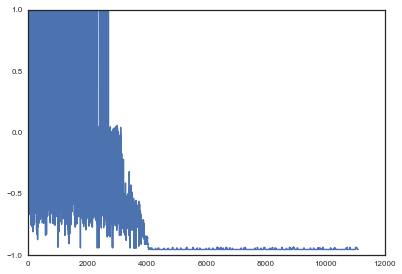

In [613]:
print s10,s11,s7,s12
plt.plot(amount10)

In [181]:
print s13,s14,s15,s16
        

[15, 39, 28, 23, 19, 16] [39, 23, 52, 9, 27] [39, 15, 19, 35, 29, 27] [53, 9, 37, 28, 54]


In [20]:
dictionary = {}
dictionary['y'] = dictionary1['y']
string = "y~"
for j in [50, 49, 14, 3, 24, 52, 5]: #, 52, 23, 27, 8, 19
    if j > 2 and j not in [56]: 
        dictionary['x%d'%j] = dictionary1['x%d'%j]                                        
        string += 'x%d+'%j

data = pd.DataFrame(dictionary)
        
string = string[0:len(string)-1]
if len(data.dropna())>1:
    model = ols(formula = string,data=data).fit()


In [32]:
print model.params

Intercept    55.570581
x60           0.144517
dtype: float64


In [143]:
print "The estimate of sigma^2 is "+str((model.resid**2).mean())+"."
print "The estimate of sigma is "+str(np.sqrt((model.resid**2).mean()))+"."
interval = [(model.resid**2).sum()/chi2.ppf(0.975, 24),(model.resid**2).sum()/chi2.ppf(0.025, 24)]
print "The confidence interval of sigma^2 is ["+str(interval[0])+", "+str(interval[1])+"]."
print "The confidence interval of sigma is ["+str(np.sqrt(interval[0]))+", "+str(np.sqrt(interval[1]))+"]."

The estimate of sigma^2 is 0.668411945082.
The estimate of sigma is 0.817564642754.
The confidence interval of sigma^2 is [0.509407558036, 1.61697568378].
The confidence interval of sigma is [0.713727929981, 1.27160358751].


In [612]:
print "For 2009:"
for index in s12:
    print file_list[index]['Indicator Name'][0]

For 2009:
Internet users (per 100 people)
Ratio of female to male primary enrollment (%)
Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)
Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)
Population ages 0-14 (% of total)
Employment to population ratio, 15+, total (%) (modeled ILO estimate)
Ratio of female to male tertiary enrollment (%)


In [25]:
print "For all years:"
for index in [50, 49, 14, 3, 24, 52, 5]:
    print file_list[index]['Indicator Name'][0]

For all years:
Intentional homicide victims killed during commission of a robbery as percentage of total homicide victims, by country/territory (2005-2012)
Male and female intentional homicide victims killed by intimate partners or family members as a percentage of total homicide victims, by country/territory
Pupil-teacher ratio, primary
Public spending on education, total (% of government expenditure)
Long-term unemployment, male (% of male unemployment)
Internet users (per 100 people)
Expenditure per student, primary (% of GDP per capita)


In [615]:
s7

[39, 9, 52, 23, 27, 8, 19]

In [589]:
# s2, s3,4x s9,20x s12,20x s13,5x s15 were for 2009 data; s,s4,s5,s6,4x s7,4x s8,10x s10,20x s11,5x s14,5xf s16,5xm s17 were for 2010 
# 5x s18 number of iterations/10 total data, 5x s19 for total data, 5xf s20 for total data, 5xm s21 for total data, 5x s22 for 2008 data
t = 0
for a in s9:
    if a in s7:
         t += 1.
print t/len(s7)

0


In [24]:
def logprior(b, sigma2, opt1):
    if opt1 == "flat":
        return -np.log(sigma2)
    if opt1 == "conjugate":
        t = -(b[0]-40.)**2*2.
        for index in xrange(1,len(b)):
            t += -b[index]**2*2.
        return t - 2.0*np.log(sigma2) - 0.5/sigma2
    if opt1 == "conjugate2":
        t = -(b[0]-40.)**2*2.
        for index in xrange(1,len(b)):
            t += -b[index]**2*2.
        return t - 4.0*np.log(sigma2) - 0.5/sigma2
    if opt1 == "test":
        t = -(b[0]-40.)**2*2.
        for index in xrange(1,len(b)):
            t += -b[index]**2*2.
        return t - 4.5*np.log(sigma2) - 0.5/sigma2
def loglikelihood(b, sigma2, x, y, opt2):
    n = len(x[0])
    if opt2 == "gaussian":
        vec = b[1]*x[0]
        for j in xrange(len(x)-1):
            vec += b[j+2]*x[j+1]
        return -0.5*n*np.log(sigma2) - 0.5*((y-b[0]-vec)**2).sum()/sigma2
    if opt2 == "t":
        vec = b[1]*x[0]
        for j in xrange(len(x)-1):
            vec += b[j+2]*x[j+1]
        return -0.5*n*np.log(sigma2) - 1.5*(np.log(1+0.5*(y-b[0]-vec)**2/sigma2)).sum()
    if opt2 == "t6":
        vec = b[1]*x[0]
        for j in xrange(len(x)-1):
            vec += b[j+2]*x[j+1]
        return -0.5*n*np.log(sigma2) - 3.5*(np.log(1+1./6.*(y-b[0]-vec)**2/sigma2)).sum()
    if opt2 == "test":
        vec = b[1]*x[0]
        for j in xrange(len(x)-1):
            vec += b[j+2]*x[j+1]
        return -0.5*n*np.log(sigma2) - 4.*(np.log(1+1./7.*(y-b[0]-vec)**2/sigma2)).sum()
    
def logpost(b, sigma2, x, y, opt1, opt2):
    return logprior(b, sigma2, opt1) + loglikelihood(b, sigma2, x, y, opt2)

In [8]:
# mcmc algorithm
def mcmc(b, sigma2, x, y, opt1, opt2, N, burnin, e1, e2, e3):
    B = np.zeros((len(b),N))
    Sigma2 = np.zeros(N)
    bnew = np.zeros(len(b))
    bold = b.copy()
    
    sigma2old = sigma2
    count = 0
    r = np.random.random(N)
    for i in xrange(N):
        for j in xrange(len(b)):
            bnew[j] = np.random.normal(bold[j], e1)
        sigma2new = abs(np.random.normal(sigma2old, e3))
        p = logpost(bnew, sigma2new, x, y, opt1, opt2) - logpost(bold, sigma2old, x, y, opt1, opt2)
        if np.log(r[i]) < p:
            bold = bnew.copy()
            sigma2old = sigma2new
            count += 1
                           
        B[:,i]= bold.copy()
        Sigma2[i] = sigma2old
    print "The acceptance rate is "+ str(float(count)/N)+"."
    return np.vstack((B[:,burnin:],Sigma2[burnin:]))

In [9]:
# show posterior mean and variance
def post_ana(res):
    mean = res.mean(axis = 1)
    sd = np.zeros(7)
    sd[0] = np.std(res[0,:])
    sd[1] = np.std(res[1,:])
    sd[2] = np.std(res[2,:])
    sd[3] = np.std(res[3,:])
    sd[4] = np.std(res[4,:])
    sd[5] = np.std(res[5,:])
    sd[6] = np.std(res[6,:])
    print "The posterior mean and standard deviation for beta0 are "+str(mean[0])+" and "+str(sd[0])+"."
    print "The posterior mean and standard deviation for beta1 are "+str(mean[1])+" and "+str(sd[1])+"."
    print "The posterior mean and standard deviation for beta2 are "+str(mean[2])+" and "+str(sd[2])+"."
    print "The posterior mean and standard deviation for beta3 are "+str(mean[3])+" and "+str(sd[3])+"."
    print "The posterior mean and standard deviation for beta4 are "+str(mean[4])+" and "+str(sd[4])+"."
    print "The posterior mean and standard deviation for beta5 are "+str(mean[5])+" and "+str(sd[5])+"."
    print "The posterior mean and standard deviation for sigma2 are "+str(mean[6])+" and "+str(sd[6])+"."

In [10]:
# autocorrelaiton plot
def plot_acf_lm(res, lags):
    autob0 = acf(res[0,:], nlags = lags)
    autob1 = acf(res[1,:], nlags = lags)
    autosigma2 = acf(res[6,:], nlags = lags)
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    plt.plot(autob0)
    plt.xlabel("lag")
    plt.ylim((0,1))
    plt.title("Autocorrelation plot of beta0")
    plt.subplot(132)
    plt.plot(autob1)
    plt.ylim((0,1))
    plt.xlabel("lag")
    plt.title("Autocorrelation plot of beta")
    plt.subplot(133)
    plt.plot(autosigma2)
    plt.ylim((0,1))
    plt.xlabel("lag")
    plt.title("Autocorrelation plot of sigma2")
    plt.show()

In [11]:
# posterior histogram
def plot_hist(res):
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    plt.hist(res[0,:])
    plt.title("Histogram of beta0")
    plt.subplot(132)
    plt.hist(res[1,:])
    plt.title("Histogram of beta")
    plt.subplot(133)
    plt.hist(res[6,:])
    plt.title("Histogram of sigma2")

In [25]:
# compute the predictive intervals at each x 
def predict(res, x, y, m, opt2):
    n = len(x[0])
    q = len(x)
   #x = x.reshape((n,q))
    count = 0
    Result = np.zeros((n, res.shape[1]*m))
    if opt2 == "gaussian":
        for i in xrange(res.shape[1]):
            vec = res[0,i] + res[1,i]*np.array(x[0]).reshape(n,1)
            for j in xrange(len(x)-1):
                vec += res[j+2,i]*np.array(x[j+1]).reshape(n,1)
            Result[:,(i*m):(i*m+m)] = np.random.normal(scale = res[6,i], size=m*n).reshape((n,m)) + np.repeat(vec,m, axis=1)
    if opt2 == "t":
        for i in xrange(res.shape[1]):
            vec = res[0,i] + res[1,i]*np.array(x[0]).reshape(n,1)
            for j in xrange(len(x)-1):
                vec += res[j+2,i]*np.array(x[j+1]).reshape(n,1)
            Result[:,(i*m):(i*m+m)] = np.random.standard_t(df=2, size=m*n).reshape((n,m))*res[6,i] + np.repeat(vec,m, axis=1)
    if opt2 == "t6":
        for i in xrange(res.shape[1]):
            vec = res[0,i] + res[1,i]*np.array(x[0]).reshape(n,1)
            for j in xrange(len(x)-1):
                vec += res[j+2,i]*np.array(x[j+1]).reshape(n,1)
            Result[:,(i*m):(i*m+m)] = np.random.standard_t(df=6, size=m*n).reshape((n,m))*res[6,i] + np.repeat(vec,m, axis=1)
    if opt2 == "test":
        for i in xrange(res.shape[1]):
            vec = res[0,i] + res[1,i]*np.array(x[0]).reshape(n,1)
            for j in xrange(len(x)-1):
                vec += res[j+2,i]*np.array(x[j+1]).reshape(n,1)
            Result[:,(i*m):(i*m+m)] = np.random.standard_t(df=7, size=m*n).reshape((n,m))*res[6,i] + np.repeat(vec,m, axis=1)
    bounds = np.zeros((n,2))
    for i in xrange(n):
        bounds[i,:] = np.percentile(Result[i,:], [2.5,97.5])
        if y[i] < bounds[i,1] and y[i] > bounds[i,0]:
            count += 1
    print "There are "+str(count) +" yis out of "+str(n) +" that fall in the predictive interval."
    return bounds

In [13]:
num_par = len(s14)
b = np.zeros(num_par+1)
b[0] = 40.
sigma2 = 1
N = 20000
burnin = 5000
m = 100
dictionary = {}
dictionary['y'] = file_list[0]['2010']
string = "y~"

for j in s14:
    if j > 2 and j not in [56]: 
        dictionary['x%d'%j] = file_list[j]['2010']
        string += 'x%d+'%j

data = pd.DataFrame(dictionary)

feeder = []
for j in s14:
    if j > 2 and j not in [56]: 
        feeder += [data.dropna()['x%d'%j]]
        
string = string[0:len(string)-1]
if len(data.dropna())>1:
    model = ols(formula = string,data=data).fit()


In [134]:
#e1, e2, e3 = 0.15, 0.15, 0.25
#res_gaussian_flat = mcmc(b, sigma2, [data.dropna()['x39'],data.dropna()['x23'],data.dropna()['x52'],data.dropna()['x9'],data.dropna()['x27']], data.dropna()['y'], "flat", "gaussian", N, burnin, e1, e2, e3)
bounds_gaussian_flat = predict(res_gaussian_flat, [data.dropna()['x39'],data.dropna()['x23'],data.dropna()['x52'],data.dropna()['x9'],data.dropna()['x27']], data.dropna()['y'], m, "gaussian") 
post_ana(res_gaussian_flat)

The acceptance rate is 0.0011.
There are 30 yis out of 30 that fall in the predictive interval.
The posterior mean and standard deviation for beta0 are 39.9981039104 and 0.0383799484624.
The posterior mean and standard deviation for beta1 are -0.138315495711 and 0.0267206621798.
The posterior mean and standard deviation for beta2 are 0.496585531364 and 0.0723405534374.
The posterior mean and standard deviation for beta3 are 0.184189209948 and 0.0588613304892.
The posterior mean and standard deviation for beta4 are 0.154290171911 and 0.0367602984928.
The posterior mean and standard deviation for beta5 are -0.309206392905 and 0.0432192673576.
The posterior mean and standard deviation for sigma2 are 1.45404126005 and 0.113527040088.


In [137]:
res_gaussian_conjugate = mcmc(b, sigma2, [data.dropna()['x39'],data.dropna()['x23'],data.dropna()['x52'],data.dropna()['x9'],data.dropna()['x27']], data.dropna()['y'], "conjugate", "gaussian", N, burnin, e1, e2, e3)
bounds_gaussian_conjugate = predict(res_gaussian_conjugate,[data.dropna()['x39'],data.dropna()['x23'],data.dropna()['x52'],data.dropna()['x9'],data.dropna()['x27']], data.dropna()['y'], m, "gaussian") 
post_ana(res_gaussian_conjugate)

The acceptance rate is 0.0008.
There are 30 yis out of 30 that fall in the predictive interval.
The posterior mean and standard deviation for beta0 are 39.5804352937 and 0.0714064366731.
The posterior mean and standard deviation for beta1 are -0.123068385002 and 0.00967840789796.
The posterior mean and standard deviation for beta2 are 0.437794033732 and 0.0274393008922.
The posterior mean and standard deviation for beta3 are 0.173245538086 and 0.025146949967.
The posterior mean and standard deviation for beta4 are 0.184044186111 and 0.0170132098932.
The posterior mean and standard deviation for beta5 are -0.283831133661 and 0.0220666720349.
The posterior mean and standard deviation for sigma2 are 1.52488862412 and 0.186985675667.


In [138]:
e1, e2, e3 = 0.1, 0.1, 0.1
res_t_flat = mcmc(b, sigma2,[data.dropna()['x39'],data.dropna()['x23'],data.dropna()['x52'],data.dropna()['x9'],data.dropna()['x27']], data.dropna()['y'], "flat", "t", N, burnin, e1, e2, e3)
bounds_t_flat = predict(res_t_flat, [data.dropna()['x39'],data.dropna()['x23'],data.dropna()['x52'],data.dropna()['x9'],data.dropna()['x27']], data.dropna()['y'], m, "t") 
post_ana(res_t_flat)

The acceptance rate is 0.0011.
There are 30 yis out of 30 that fall in the predictive interval.
The posterior mean and standard deviation for beta0 are 40.4111264391 and 0.0322858317266.
The posterior mean and standard deviation for beta1 are -0.0994213623673 and 0.0131151424675.
The posterior mean and standard deviation for beta2 are 0.39136842649 and 0.0146071975267.
The posterior mean and standard deviation for beta3 are 0.165785289253 and 0.00636218880145.
The posterior mean and standard deviation for beta4 are 0.182969313081 and 0.00701448249081.
The posterior mean and standard deviation for beta5 are -0.246650711092 and 0.00183141026857.
The posterior mean and standard deviation for sigma2 are 0.85121690601 and 0.00966642791099.


In [139]:
res_t_conjugate = mcmc(b, sigma2, [data.dropna()['x39'],data.dropna()['x23'],data.dropna()['x52'],data.dropna()['x9'],data.dropna()['x27']], data.dropna()['y'], "conjugate", "t", N, burnin, e1, e2, e3)
bounds_t_conjugate = predict(res_t_conjugate, [data.dropna()['x39'],data.dropna()['x23'],data.dropna()['x52'],data.dropna()['x9'],data.dropna()['x27']], data.dropna()['y'], m, "t") 
post_ana(res_t_conjugate)

The acceptance rate is 0.00115.
There are 28 yis out of 30 that fall in the predictive interval.
The posterior mean and standard deviation for beta0 are 40.8747121439 and 0.0484490273047.
The posterior mean and standard deviation for beta1 are -0.128325330775 and 0.0161484434959.
The posterior mean and standard deviation for beta2 are 0.452614125746 and 0.0585461040288.
The posterior mean and standard deviation for beta3 are 0.193624967861 and 0.0265285564512.
The posterior mean and standard deviation for beta4 are 0.155591638096 and 0.0258779769816.
The posterior mean and standard deviation for beta5 are -0.287999331667 and 0.0396633708944.
The posterior mean and standard deviation for sigma2 are 0.369878985178 and 0.199631943061.


In [344]:
e1, e2, e3 = 0.1, 0.1, 0.1
res_t6_conjugate2 = mcmc(b, sigma2, feeder, data.dropna()['y'], "conjugate2", "t6", N, burnin, e1, e2, e3)
bounds_t6_conjugate2 = predict(res_t6_conjugate2, feeder, data.dropna()['y'], m, "t6") 
post_ana(res_t6_conjugate2)

The acceptance rate is 0.00165.
There are 30 yis out of 30 that fall in the predictive interval.
The posterior mean and standard deviation for beta0 are 40.1514470728 and 0.0462798425383.
The posterior mean and standard deviation for beta1 are -0.135776418192 and 0.0168512831797.
The posterior mean and standard deviation for beta2 are 0.476148735206 and 0.0454438344521.
The posterior mean and standard deviation for beta3 are 0.176563369636 and 0.037689211845.
The posterior mean and standard deviation for beta4 are 0.153226406939 and 0.0268880979355.
The posterior mean and standard deviation for beta5 are -0.29072768217 and 0.0291400304525.
The posterior mean and standard deviation for sigma2 are 1.60668358634 and 0.0556746952747.


In [347]:
e1, e2, e3 = 0.1, 0.1, 0.1
res_test = mcmc(b, sigma2, feeder, data.dropna()['y'], "test", "test", N, burnin, e1, e2, e3)
bounds_test = predict(res_test, feeder, data.dropna()['y'], m, "test") 
post_ana(res_test)

The acceptance rate is 0.002.
There are 30 yis out of 30 that fall in the predictive interval.
The posterior mean and standard deviation for beta0 are 39.8819183115 and 0.0827173125383.
The posterior mean and standard deviation for beta1 are -0.14525729801 and 0.0352974449413.
The posterior mean and standard deviation for beta2 are 0.400141992985 and 0.0466159329112.
The posterior mean and standard deviation for beta3 are 0.134440944608 and 0.0258680580537.
The posterior mean and standard deviation for beta4 are 0.192609192177 and 0.0128667351545.
The posterior mean and standard deviation for beta5 are -0.241206054572 and 0.0272385840625.
The posterior mean and standard deviation for sigma2 are 0.470929929136 and 0.069268684816.


In [351]:
e1, e2, e3 = 0.1, 0.1, 0.1
res_test2 = mcmc(b, sigma2, feeder, data.dropna()['y'], "test", "test", N, burnin, e1, e2, e3)
bounds_test2 = predict(res_test2, feeder, data.dropna()['y'], m, "test") 
post_ana(res_test2)

The acceptance rate is 0.0015.
There are 30 yis out of 30 that fall in the predictive interval.
The posterior mean and standard deviation for beta0 are 40.0678445982 and 0.0818620917692.
The posterior mean and standard deviation for beta1 are -0.145780176869 and 0.0195545999005.
The posterior mean and standard deviation for beta2 are 0.460240594759 and 0.0228517551934.
The posterior mean and standard deviation for beta3 are 0.178167036462 and 0.0349983458858.
The posterior mean and standard deviation for beta4 are 0.152874274063 and 0.0164494317169.
The posterior mean and standard deviation for beta5 are -0.261122936722 and 0.0236635113679.
The posterior mean and standard deviation for sigma2 are 0.998636105276 and 0.232927591329.


In [14]:
e1, e2, e3 = 0.1, 0.1, 0.1
res_test3 = mcmc(b, sigma2, feeder, data.dropna()['y'], "test", "test", N, burnin, e1, e2, e3)
bounds_test3 = predict(res_test3, feeder, data.dropna()['y'], m, "test") 
post_ana(res_test3)

The acceptance rate is 0.00175.
There are 30 yis out of 30 that fall in the predictive interval.
The posterior mean and standard deviation for beta0 are 39.6844023693 and 0.135007473831.
The posterior mean and standard deviation for beta1 are -0.143054268056 and 0.0417209445228.
The posterior mean and standard deviation for beta2 are 0.476209783508 and 0.0507752829437.
The posterior mean and standard deviation for beta3 are 0.155617170297 and 0.0411452567832.
The posterior mean and standard deviation for beta4 are 0.164636055992 and 0.021845745833.
The posterior mean and standard deviation for beta5 are -0.289801460462 and 0.030673134597.
The posterior mean and standard deviation for sigma2 are 1.13285316448 and 0.154032240428.


In [18]:
e1, e2, e3 = 0.1, 0.1, 0.1
res_test4 = mcmc(b, sigma2, feeder, data.dropna()['y'], "test", "test", N, burnin, e1, e2, e3)
bounds_test4 = predict(res_test4, feeder, data.dropna()['y'], m, "test") 
post_ana(res_test4)

The acceptance rate is 0.00155.
There are 30 yis out of 30 that fall in the predictive interval.
The posterior mean and standard deviation for beta0 are 39.4685803674 and 0.106942191369.
The posterior mean and standard deviation for beta1 are -0.149041623151 and 0.0176250243922.
The posterior mean and standard deviation for beta2 are 0.505961402926 and 0.0321359885468.
The posterior mean and standard deviation for beta3 are 0.170479556619 and 0.0231172000217.
The posterior mean and standard deviation for beta4 are 0.157172090116 and 0.0181283896603.
The posterior mean and standard deviation for beta5 are -0.309467750487 and 0.030001438142.
The posterior mean and standard deviation for sigma2 are 1.50351966949 and 0.144064901698.


In [22]:
e1, e2, e3 = 0.1, 0.1, 0.1
res_test5 = mcmc(b, sigma2, feeder, data.dropna()['y'], "test", "test", N, burnin, e1, e2, e3)
bounds_test5 = predict(res_test5, feeder, data.dropna()['y'], m, "test") 
post_ana(res_test5)

The acceptance rate is 0.0014.
There are 29 yis out of 30 that fall in the predictive interval.
The posterior mean and standard deviation for beta0 are 39.1856792452 and 0.0843623630134.
The posterior mean and standard deviation for beta1 are -0.116772065436 and 0.0190887428816.
The posterior mean and standard deviation for beta2 are 0.479051216382 and 0.0219037377444.
The posterior mean and standard deviation for beta3 are 0.184085777149 and 0.0311541921842.
The posterior mean and standard deviation for beta4 are 0.160981087011 and 0.0121128100549.
The posterior mean and standard deviation for beta5 are -0.29437307576 and 0.0227216866057.
The posterior mean and standard deviation for sigma2 are 0.784415662084 and 0.0910580345217.


In [26]:
e1, e2, e3 = 0.1, 0.1, 0.1
res_test7 = mcmc(b, sigma2, feeder, data.dropna()['y'], "test", "test", N, burnin, e1, e2, e3)
bounds_test7 = predict(res_test7, feeder, data.dropna()['y'], m, "test") 
post_ana(res_test7)

The acceptance rate is 0.00145.
There are 30 yis out of 30 that fall in the predictive interval.
The posterior mean and standard deviation for beta0 are 39.4434453423 and 0.0794036647804.
The posterior mean and standard deviation for beta1 are -0.112462253393 and 0.0302040574316.
The posterior mean and standard deviation for beta2 are 0.461588949274 and 0.0330377336253.
The posterior mean and standard deviation for beta3 are 0.196094536004 and 0.0273839547177.
The posterior mean and standard deviation for beta4 are 0.170705957715 and 0.0134179054892.
The posterior mean and standard deviation for beta5 are -0.303935339168 and 0.0231141706876.
The posterior mean and standard deviation for sigma2 are 1.1680442395 and 0.177415700867.


In [146]:
print "t, conjugate", (bounds_t_conjugate[:,1]-bounds_t_conjugate[:,0]).mean()
print "t, flat", (bounds_t_flat[:,1]-bounds_t_flat[:,0]).mean()
print "Gaussian, conjugate", (bounds_gaussian_conjugate[:,1]-bounds_gaussian_conjugate[:,0]).mean()
print "Gaussian, flat", (bounds_gaussian_flat[:,1]-bounds_gaussian_flat[:,0]).mean()

t, conjugate 3.77550276576
t, flat 7.34764778567
Gaussian, conjugate 6.2191863789
Gaussian, flat 6.18469890339


In [352]:
print "t6, conjugate2", (bounds_t6_conjugate2[:,1]-bounds_t6_conjugate2[:,0]).mean()
print "t1, test", (bounds_test[:,1]-bounds_test[:,0]).mean()
print "t10, test", (bounds_test2[:,1]-bounds_test2[:,0]).mean()

t6, conjugate2 8.00286109874
t1, test 12.0538314281
t10, test 4.96327832382


In [23]:
print "t3, test", (bounds_test3[:,1]-bounds_test3[:,0]).mean()
print "t4, test", (bounds_test4[:,1]-bounds_test4[:,0]).mean()
print "t5, test", (bounds_test5[:,1]-bounds_test5[:,0]).mean()

t3, test 7.58753609556
t4, test 8.60135276468
t5, test 4.38615620394


In [625]:
#f = open('data_file_keys.txt','r')
#lines = f.readlines()
#f.close()
#t = 1
#for line_number in xrange(len(lines)):
#    if lines[line_number][0] == 's' or lines[line_number][0] == 'G':
#        file_name = 'data_'
#        for j in xrange(7,14):
#            if lines[line_number][j] != '.':
#                file_name += lines[line_number][j]
#        print '#' + lines[line_number+1][1:len(lines[line_number+1])-1] + '----------------- %d' %t
#        print file_name + ' = pd.DataFrame.from_csv("'+lines[line_number][0:len(lines[line_number])-1]+'",header=2)'
#        print
#        t += 1

s7

[39, 9, 52, 23, 27, 8, 19]

In [37]:
lister = []
enumerator = []
params = []
for j in xrange(61):
    string = ""
    dictionary = {}
    dictionary['y'] = file_list[0]['2010']
    string = "y~"
    if j > 2 and j not in [56]: 
        dictionary['x%d'%j] = file_list[j]['2010']
        string += 'x%d+'%j
        data = pd.DataFrame(dictionary)
        string = string[0:len(string)-1]
        if len(data.dropna())>1:
            model = ols(formula = string,data=data).fit()
            lister.append(model.rsquared_adj)
            enumerator.append(j)
            params.append(model.params[1])



In [71]:
t = np.argmax(lister)
print file_list[37]['Indicator Name'][0]

Poverty gap at $1.25 a day (PPP) (%)


In [38]:
t = np.argsort(lister)[-5:]
for index in t:#[28, 32, 52, 51, 37]:#[39, 23, 52, 9, 27]:#
    print file_list[enumerator[index]]['Indicator Name'][0], params[index]

Internet users (per 100 people) 0.268582809571
Poverty gap at $1.25 a day (PPP) (%) -0.542852521085
Population ages 0-14 (% of total) -0.713297302606
Pupil-teacher ratio, primary -0.534544930866
Poverty headcount ratio at $1.25 a day (PPP) (% of population) -0.276726610098


In [230]:
for j in [54]: #39, 9, 52, 23, 27,, 19 
    string = ""
    dictionary = {}
    dictionary['y'] = file_list[0]['2010']
    string = "y~"
    if j > 2 and j not in [56]: 
        dictionary['x%d'%j] = file_list[j]['2010']
        string += 'x%d+'%j
        data = pd.DataFrame(dictionary)
        string = string[0:len(string)-1]
        if len(data.dropna())>1:
            model = ols(formula = string,data=data).fit()
            print model.params
            print model.rsquared_adj
            print file_list[j]['Indicator Name'][0]

Intercept    72.090029
x54          -0.902663
dtype: float64
0.0178264982558
Health expenditure, private (% of GDP)


In [88]:
for index in [39-3, 23-3, 52-3, 9-3, 27-3]:
    print lister[index]
    print enumerator[index]

0.738967495153
39
0.0925892272649
23
0.618617303972
52
0.553224288446
9
0.0914929791187
27


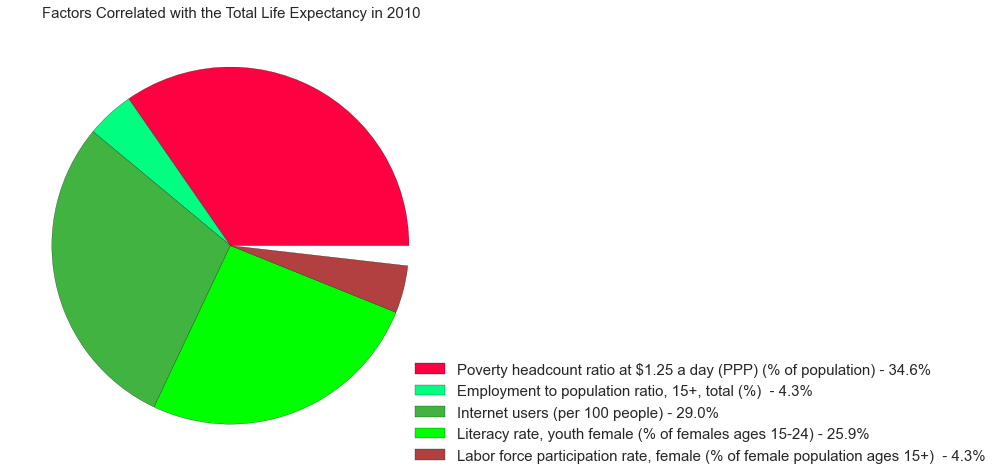

In [217]:
xs = [] #0.738967495153,0.553224288446,0.618617303972,0.0925892272649,0.0914929791187,0.57812381859,0.680171065901]
for index in s14:
    xs += [lister[index-3]]
xs = np.array(xs)
xs = xs/sum(xs)*model.rsquared_adj
label = []
t = 0
for index in s14:
    if file_list[index]['Indicator Name'][0][-22:] == '(modeled ILO estimate)':
        label += [file_list[index]['Indicator Name'][0][:len(file_list[index]['Indicator Name'][0])-22]+' - %2.1f%%'%(100.*xs[t])]
    else:
        label += [file_list[index]['Indicator Name'][0]+' - %2.1f%%'%(100.*xs[t])]
    t += 1

plt.figure(figsize=(8,8))
plt.pie(xs, explode=None,
    colors=((1,0,0.25), (0,1,0.5), (0.25,0.7,0.25), (0,1,0), (0.7,0.25,0.25), 'y', 'k', 'w'),
    autopct=None, pctdistance=0.6, shadow=False,
    labeldistance=0, startangle=None, radius=None,
    counterclock=True, wedgeprops=None, textprops=None)
plt.legend(label,fontsize=15,loc = (0.9,0))
plt.title('Factors Correlated with the Total Life Expectancy in 2010',fontsize=15)

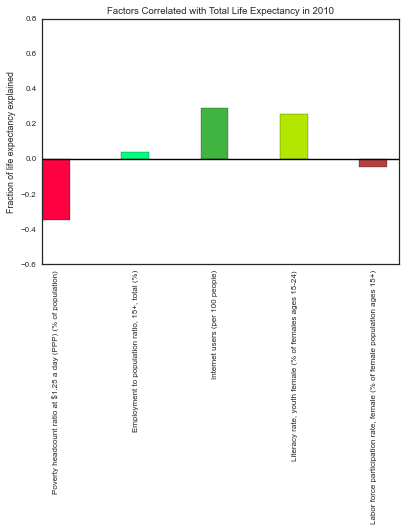

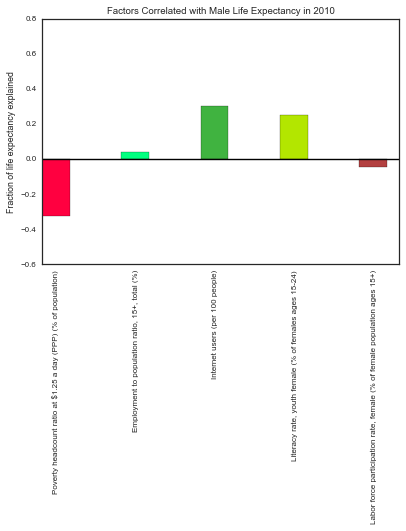

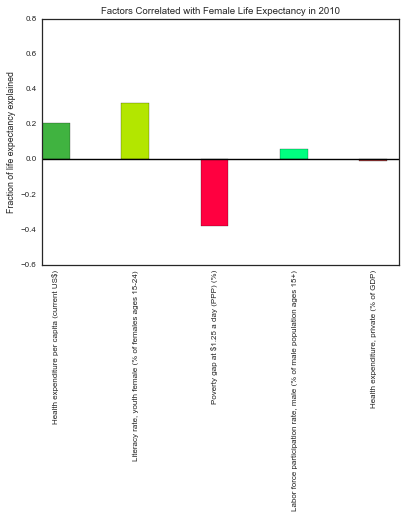

In [278]:
xsm = [] #0.738967495153,0.553224288446,0.618617303972,0.0925892272649,0.0914929791187,0.57812381859,0.680171065901]
for index in s14:
    xsm += [listerm[index-3]]
xsm = np.array(xsm)
xsm = xsm/sum(xsm)*model.rsquared_adj
xsf = []
for index in s16:
    xsf += [listerf[index-3]]
xsf = np.array(xsf)
xsf = xsf/sum(xsf)*modelf.rsquared_adj

N = len(xs)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, xs,   width, color=((1,0,0.25),(0,1,0.5),(0.25,0.7,0.25),(0.7,0.9,0),(0.7,0.25,0.25)), bottom=(-xs[0],0,0,0,-xs[4]))

plt.ylabel('Fraction of life expectancy explained')
plt.title('Factors Correlated with Total Life Expectancy in 2010')
plt.xticks(ind+width/2., (file_list[s14[0]]['Indicator Name'][0],file_list[s14[1]]['Indicator Name'][0][:len(file_list[s14[1]]['Indicator Name'][0])-22], file_list[s14[2]]['Indicator Name'][0],file_list[s14[3]]['Indicator Name'][0],file_list[s14[4]]['Indicator Name'][0][:len(file_list[s14[4]]['Indicator Name'][0])-22]),rotation=90 )
#plt.tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom='off',      # ticks along the bottom edge are off
#    top='off',         # ticks along the top edge are off
#    labelbottom='off') # labels along the bottom edge are off
plt.plot((ind[0],ind[4]+1./2),(0,0),color='k')
plt.yticks(np.arange(-0.6,1,0.2))
#plt.legend( (p1[0], p2[0],p3[0],p4[0],p5[0],p6[0],p8[0],p9[0],p10[0]), ,file_list[s16[0]]['Indicator Name'][0],file_list[s16[2]]['Indicator Name'][0],file_list[s16[3]]['Indicator Name'][0][:len(file_list[s16[3]]['Indicator Name'][0])-22],file_list[s16[4]]['Indicator Name'][0]) )
#plt.legend([file_list[s14[0]]['Indicator Name'][0],file_list[s14[1]]['Indicator Name'][0][:len(file_list[s14[1]]['Indicator Name'][0])-22], file_list[s14[2]]['Indicator Name'][0],file_list[s14[3]]['Indicator Name'][0],file_list[s14[4]]['Indicator Name'][0][:len(file_list[s14[4]]['Indicator Name'][0])-22]])
plt.show()

plt.figure
p2 = plt.bar(ind, xsm,   width, color=((1,0,0.25),(0,1,0.5),(0.25,0.7,0.25),(0.7,0.9,0),(0.7,0.25,0.25)), bottom=(-xsm[0],0,0,0,-xsm[4]))
plt.ylabel('Fraction of life expectancy explained')
plt.title('Factors Correlated with Male Life Expectancy in 2010')
plt.xticks(ind+width/2., (file_list[s14[0]]['Indicator Name'][0],file_list[s14[1]]['Indicator Name'][0][:len(file_list[s14[1]]['Indicator Name'][0])-22], file_list[s14[2]]['Indicator Name'][0],file_list[s14[3]]['Indicator Name'][0],file_list[s14[4]]['Indicator Name'][0][:len(file_list[s14[4]]['Indicator Name'][0])-22]),rotation=90 )
plt.plot((ind[0],ind[4]+1./2),(0,0),color='k')
plt.yticks(np.arange(-0.6,1,0.2))
plt.show()
 
plt.figure
p3 = plt.bar(ind, xsf,   width, color=((0.25,0.7,0.25),(0.7,0.9,0),(1,0,0.25),(0,1,0.5),(0.7,0.25,0.25)), bottom=(0,0,-xsf[2],0,-xsf[4]))
plt.ylabel('Fraction of life expectancy explained')
plt.title('Factors Correlated with Female Life Expectancy in 2010')
plt.xticks(ind+width/2., (file_list[s16[0]]['Indicator Name'][0],file_list[s16[1]]['Indicator Name'][0], file_list[s16[2]]['Indicator Name'][0],file_list[s16[3]]['Indicator Name'][0][:len(file_list[s16[3]]['Indicator Name'][0])-22],file_list[s16[4]]['Indicator Name'][0]),rotation=90 )
plt.plot((ind[0],ind[4]+1./2),(0,0),color='k')
plt.yticks(np.arange(-0.6,1,0.2))
plt.show()

(1) Poverty headcount ratio at $1.25 a day (PPP) (% of population)
(2) Employment to population ratio, 15+, total (%) 
(3) Internet users (per 100 people)
(4) Literacy rate, youth female (% of females ages 15-24)
(5) Labor force participation rate, female (% of female population ages 15+) 


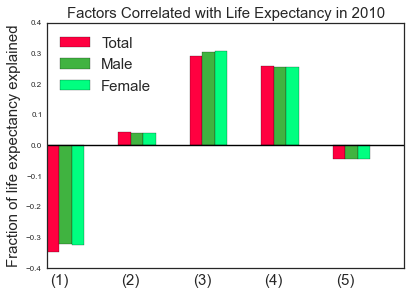

In [333]:
xsf2 = []
for index in s14:
    xsf2 += [listerf[index-3]]
xsf2 = np.array(xsf2)
xsf2 = xsf2/sum(xsf2)*modelf2.rsquared_adj
p1 = plt.bar(ind, xs,   width/2., color=(1,0,0.25), bottom=(-xs[0],0,0,0,-xs[4]))
p2 = plt.bar(ind+width/2., xsm,   width/2., color=(0.25,0.7,0.25), bottom=(-xsm[0],0,0,0,-xsm[4]))
p3 = plt.bar(ind+width,xsf2,width/2., color=(0,1,0.5),bottom=(-xsf2[0],0,0,0,-xsf2[4]))
plt.ylabel('Fraction of life expectancy explained',fontsize=15)
plt.title('Factors Correlated with Life Expectancy in 2010',fontsize=15)
plt.legend( (p1[0], p2[0],p3[0]), ('Total','Male','Female'),fontsize=15,loc='best')
plt.plot((ind[0],ind[4]+1.),(0,0),color='k')
plt.xticks(ind+width/2.,('(1)','(2)','(3)','(4)','(5)') ,fontsize=15 )
print '(1) '+file_list[s14[0]]['Indicator Name'][0]
print '(2) '+file_list[s14[1]]['Indicator Name'][0][:len(file_list[s14[1]]['Indicator Name'][0])-22]
print '(3) '+file_list[s14[2]]['Indicator Name'][0]
print '(4) '+file_list[s14[3]]['Indicator Name'][0]
print '(5) '+file_list[s14[4]]['Indicator Name'][0][:len(file_list[s14[4]]['Indicator Name'][0])-22]
#(file_list[s14[0]]['Indicator Name'][0],file_list[s14[1]]['Indicator Name'][0][:len(file_list[s14[1]]['Indicator Name'][0])-22], file_list[s14[2]]['Indicator Name'][0],file_list[s14[3]]['Indicator Name'][0],file_list[s14[4]]['Indicator Name'][0][:len(file_list[s14[4]]['Indicator Name'][0])-22])
#np.array([ind[0]-10.*width,ind[1]-width,ind[2]/2.,ind[3]/2.,ind[4]/2.])

In [324]:
print s14,s16,s17

[39, 23, 52, 9, 27] [53, 9, 37, 28, 54] [9, 39, 52, 23, 27]


In [326]:
#x53            0.0052      0.001      4.626      0.000         0.003     0.008
#x9             0.2370      0.019     12.192      0.000         0.197     0.277
#x37           -0.4523      0.035    -12.859      0.000        -0.525    -0.380
#x28            0.1949      0.051      3.832      0.001         0.090     0.300
#x54           -0.4239
listerf[27-3]

0.091474640687458031

In [28]:
[file_list[2]['2010'],file_list[2]['2009']]

[Country Name
 Aruba                   72.593000
 Andorra                       NaN
 Afghanistan             58.384000
 Angola                  49.241000
 Albania                 73.959000
 Arab World              67.770838
 United Arab Emirates    75.623000
 Argentina               72.046000
 Armenia                 70.946000
 American Samoa                NaN
 Antigua and Barbuda     72.990000
 Australia               79.500000
 Austria                 77.700000
 Azerbaijan              67.442000
 Burundi                 50.965000
 ...
 United States                     76.200000
 Uzbekistan                        64.629000
 St. Vincent and the Grenadines    70.142000
 Venezuela, RB                     71.269000
 Virgin Islands (U.S.)             76.100000
 Vietnam                           70.681000
 Vanuatu                           68.915000
 West Bank and Gaza                71.020000
 World                             68.251576
 Samoa                             69.329000
 Yemen

In [17]:
s18

[50, 55, 30, 26, 15, 5, 18, 53, 4]

In [10]:
s19, s21

([50, 49, 14, 3, 24, 52, 5], [46, 53, 22, 18, 11, 36, 42, 40])